In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data

Review: how to t-test w/ `scipy`

In [9]:
mpg = data('mpg')
mpg.trans = mpg.trans.str[:-4]
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


- $H_0$: automatic cars have the same city mileage as the overall population
- $H_a$: automatic cars do not have the same city mileage as the overall population

In [10]:
pop_city_mileage = mpg.cty.mean()

In [15]:
automatic_city_mileage = mpg[mpg.trans == 'auto'].cty

In [16]:
stats.ttest_1samp(automatic_city_mileage, pop_city_mileage)

Ttest_1sampResult(statistic=-2.9001322447463838, pvalue=0.004268839797630685)

In [22]:
t_stat, p = stats.ttest_1samp(automatic_city_mileage, pop_city_mileage)

t_stat

-2.9001322447463838

Do volkswagens get better highway mileage than average?

- null: there is no difference in the average highway mileage for volkwagens vs the population
- alt: there is a difference in the average highway mileage for volkwagens vs the population

In [32]:
volks_highway_mileage = mpg[mpg.manufacturer == 'volkswagen'].hwy

In [31]:
stats.ttest_1samp(volks_highway_mileage, mpg.hwy.mean())

Ttest_1sampResult(statistic=5.652041311757083, pvalue=6.068818710469792e-06)

In [42]:
stats.ttest_1samp(volks_highway_mileage, mpg.hwy.mean())

Ttest_1sampResult(statistic=5.652041311757083, pvalue=6.068818710469792e-06)

Do compact or midsize cars get better city gas mileage?

In [36]:
compact_mileage = mpg[mpg['class'] == 'compact'].cty
midsize_mileage = mpg[mpg['class'] == 'midsize'].cty

In [37]:
type(compact_mileage), type(midsize_mileage)

(pandas.core.series.Series, pandas.core.series.Series)

In [38]:
stats.ttest_ind(compact_mileage, midsize_mileage)

Ttest_indResult(statistic=2.2845195147123536, pvalue=0.024803276085898066)

In [39]:
mpg.groupby('class').hwy.mean()

class
2seater       24.800000
compact       28.297872
midsize       27.292683
minivan       22.363636
pickup        16.878788
subcompact    28.142857
suv           18.129032
Name: hwy, dtype: float64

- `ttest_1samp(sequence of values: list, population average: float)`
- `ttest_ind(sequence of values 1: list, sequence of values 2: list)`

Correlation

- compare 2 cont. vars
- **linear** relationship
- number between -1 and 1

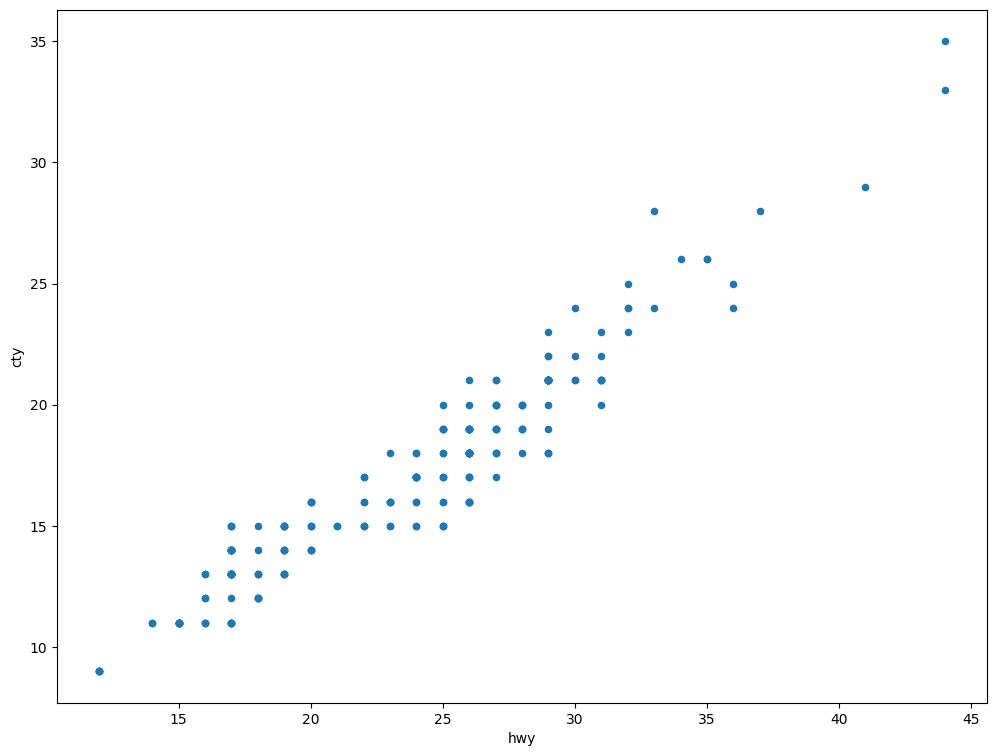

In [43]:
mpg.plot.scatter(x='hwy', y='cty')

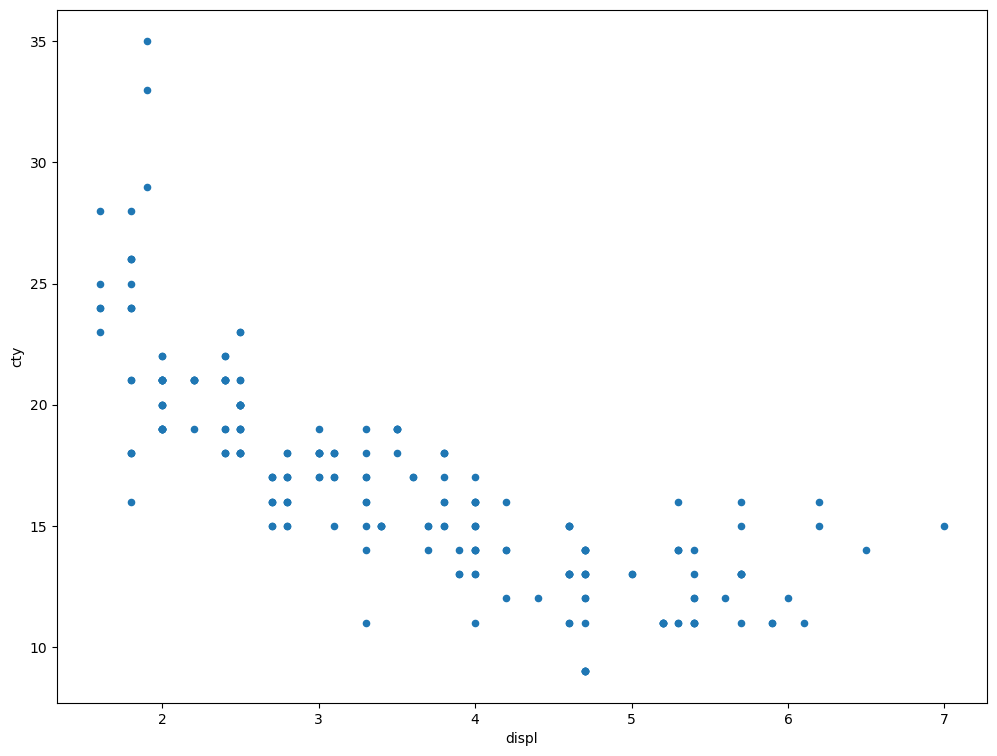

In [44]:
mpg.plot.scatter(x='displ', y='cty')

In [56]:
displ = mpg.displ
cty = mpg.cty

mpg[['displ', 'cty']]

,displ,cty
1,1.8,18
2,1.8,21
3,2.0,20
4,2.0,21
5,2.8,16
...,...,...
230,2.0,19
231,2.0,21
232,2.8,16
233,2.8,18


Is there a linear relationship between city mileage and highway mileage?

- $H_0$: There is no linear relationship between city and highway mileage
- $H_a$: There is a linear relationship between city and highway mileage

In [50]:
x = mpg.hwy
y = mpg.cty

r, p = stats.pearsonr(x, y)

print(f'r = {r:.4}')
print(f'p = {p}')

r = 0.9559
p = 1.8683071952629614e-125


Is there a linear relationship between engine displacement (`displ`) and city mileage (`cty`)?

In [53]:
from pydataset import data
from scipy import stats

mpg = data('mpg')

x = mpg.displ
y = mpg.cty

stats.pearsonr(x, y)

(-0.7985239689348551, 4.737914890205637e-53)